In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plot # FOR ploting
import seaborn as sns # FOR ploting
import plotly.express as px
from matplotlib import style
style.use('ggplot')
import re
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split


In [2]:
df = pd.read_csv('/kaggle/input/imdb-dataset-of-50k-movie-reviews/IMDB Dataset.csv') # to load file

In [3]:
df.shape 

(50000, 2)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


Text(0.5, 1.0, 'Sentiment distribution')

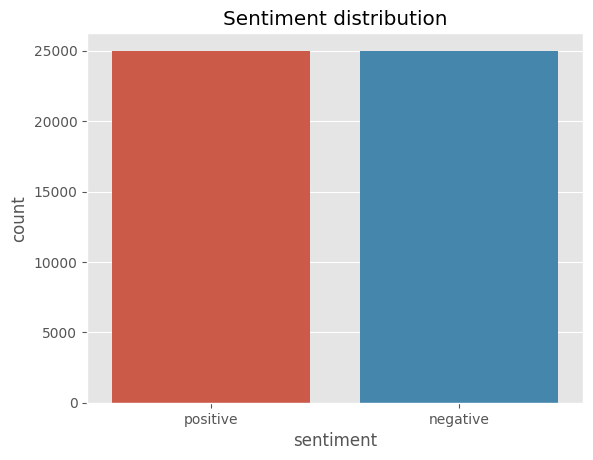

In [5]:
sns.countplot( x ='sentiment' , data = df) # to See the disribution of sentiments
plot.title("Sentiment distribution")

In [6]:
# Reviewing Reviews using for loop
for i in range(5):
    print("Review: " , [i] )
    print(df['review'].iloc[i] , "\n")
    print("Sentiment: ", df['sentiment'].iloc, "\n\n")

Review:  [0]
One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is d

In [7]:
# defining function for word count and stroing in a new column.
def no_of_words(text): 
    words = text.split()
    word_count = len(words)
    return word_count

In [8]:
df['word count'] = df['review'].apply(no_of_words)

In [9]:
df.head()

,review,sentiment,word count
0,One of the other reviewers has mentioned that ...,positive,307
1,A wonderful little production. <br /><br />The...,positive,162
2,I thought this was a wonderful way to spend ti...,positive,166
3,Basically there's a family where a little boy ...,negative,138
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,230


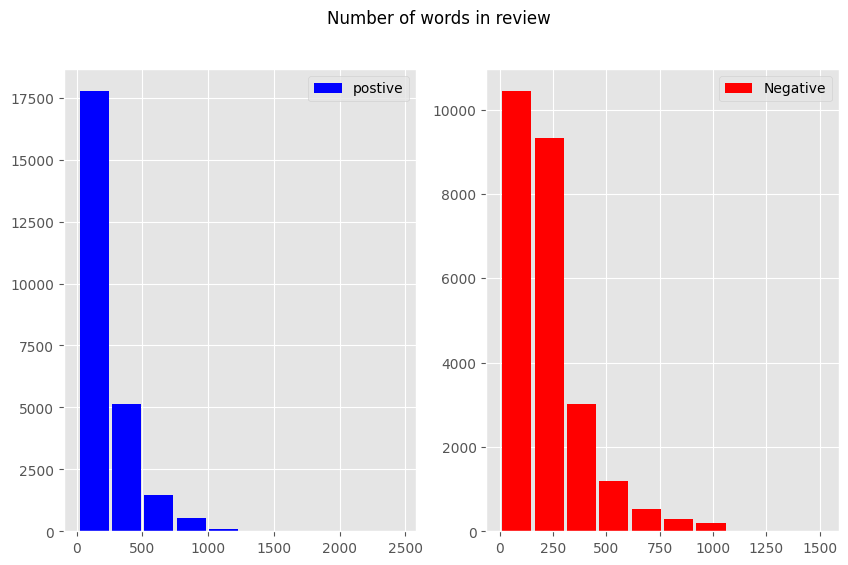

In [10]:
# Visualizing no of words : positive and negative
fig, ax = plot.subplots(1,2, figsize=(10,6))
ax[0].hist(df[df['sentiment'] == 'positive']['word count'], label='postive' , color='blue', rwidth=0.9)
ax[0].legend(loc="upper right");
ax[1].hist(df[df['sentiment'] == 'negative']['word count'], label='Negative' , color='red', rwidth=0.9)
ax[1].legend(loc="upper right");
fig.suptitle("Number of words in review")
plot.show()

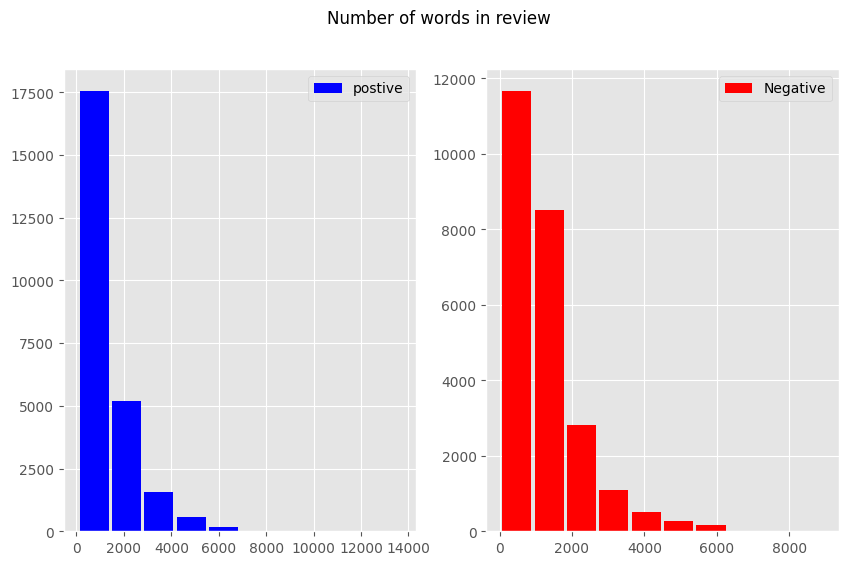

In [11]:
fig, ax = plot.subplots(1,2, figsize=(10,6))
ax[0].hist(df[df['sentiment'] == 'positive']['review'].str.len(), label='postive' , color='blue', rwidth=0.9)
ax[0].legend(loc="upper right");
ax[1].hist(df[df['sentiment'] == 'negative']['review'].str.len(), label='Negative' , color='red', rwidth=0.9)
ax[1].legend(loc="upper right");
fig.suptitle("Number of words in review")
plot.show()

In [12]:
# Converting text into numeric data
df.sentiment.replace("positive", 1 , inplace=True)
df.sentiment.replace("negative", 2 , inplace=True)

In [13]:
df.head()

,review,sentiment,word count
0,One of the other reviewers has mentioned that ...,1,307
1,A wonderful little production. <br /><br />The...,1,162
2,I thought this was a wonderful way to spend ti...,1,166
3,Basically there's a family where a little boy ...,2,138
4,"Petter Mattei's ""Love in the Time of Money"" is...",1,230


***Tokenize and removing unnecessary text.***


In [14]:
# Making a Function to process text data.
def data_processing(text):                                                     # Defining Function              
    text = text.lower()                                                        # Converting to Lowercase
    text = re.sub('<br /' , '' , text)                                         # Remove HTML Tags
    text = re.sub(r"https\S+|www\S+|http\S+", '', text, flags=re.MULTILINE)    # Remove URLs
    text = re.sub(r'\@w+|\#', '',text)                                         # Remove Mentions and Hashtags
    text = re.sub(r'[^\w\s]', '',text)                                         # Remove Punctuation
    text_tokens = word_tokenize(text)                                          # Tokenization e.g--> "Hello World" becomes ['Hello', 'World']
    filtered_text = [w for w in text_tokens if not w in stop_words]            # Remove Stopwords (is,and,are ETC)
    return " ".join(filtered_text)

In [15]:
df.review = df['review'].apply(data_processing) # Applying function

***Checking and Removing Duplicates***

In [16]:
duplicated_count = df.duplicated().sum()
print("Number of dublicate entries: " , duplicated_count)

Number of dublicate entries:  421


In [17]:
df = df.drop_duplicates('review')

A **stemming** algorithm provided by the nltk library, which reduces words to their root or base form (known as "stems"). Example:
"running" → "run"
"happily" → "happili"
"studies" → "studi"

In [18]:
stemmer = PorterStemmer()
def stemming(data):
    text = [stemmer.stem(word) for word in data]
    return data

In [19]:
df.review = df['review'].apply(lambda x: stemming(x))

In [20]:
df['word count'] = df['review'].apply(no_of_words)
df.head()

,review,sentiment,word count
0,one reviewers mentioned watching 1 oz episode ...,1,168
1,wonderful little production filming technique ...,1,84
2,thought wonderful way spend time hot summer we...,1,86
3,basically theres family little boy jake thinks...,2,67
4,petter matteis love time money visually stunni...,1,125


In [21]:
pos_reviews = df[df.sentiment == 1]
pos_reviews.head()

,review,sentiment,word count
0,one reviewers mentioned watching 1 oz episode ...,1,168
1,wonderful little production filming technique ...,1,84
2,thought wonderful way spend time hot summer we...,1,86
4,petter matteis love time money visually stunni...,1,125
5,probably alltime favorite movie story selfless...,1,58


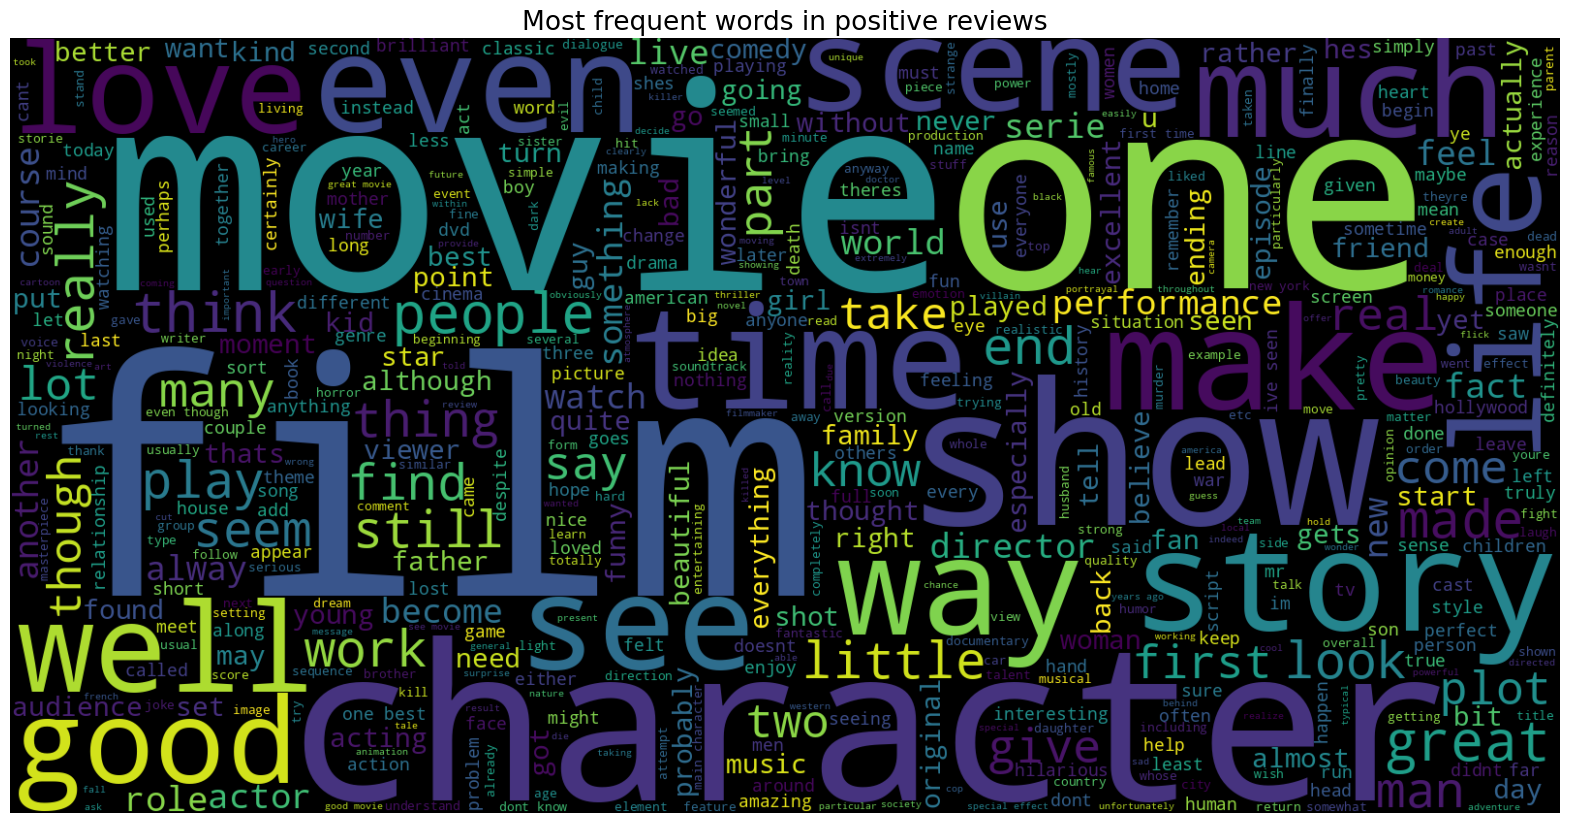

In [22]:
text = ' '.join([word for word in pos_reviews['review']])  # Combine All Reviews into a Single String
plot.figure(figsize=(20,15) , facecolor='None')
wordcloud = WordCloud(max_words=500 , width=1600, height=800).generate(text) # Create and Generate the Word Cloud
plot.imshow(wordcloud, interpolation='bilinear')
plot.axis('off')
plot.title('Most frequent words in positive reviews', fontsize=19)
plot.show()

In [23]:
# This code counts the frequency of each word in positive reviews and retrieves the 15 most common words.
from collections import Counter
count = Counter()
for text in pos_reviews['review'].values:
        for word in text.split():
            count[word] += 1
count.most_common(15)

[('film', 39285),
 ('movie', 35830),
 ('one', 25621),
 ('like', 16998),
 ('good', 14281),
 ('great', 12568),
 ('story', 12338),
 ('see', 11814),
 ('time', 11724),
 ('well', 10930),
 ('really', 10638),
 ('also', 10516),
 ('would', 10320),
 ('even', 9318),
 ('much', 8971)]

In [24]:
pos_words = pd.DataFrame(count.most_common(15))
pos_words.columns =['word','count']
pos_words.head()

,word,count
0,film,39285
1,movie,35830
2,one,25621
3,like,16998
4,good,14281


In [42]:
px.bar(pos_words , x='count' , y='word' , title='Common words in positive reviews', color='word')

For negative reviews

In [26]:
neg_reviews = df[df.sentiment == 2]
neg_reviews.head()

,review,sentiment,word count
3,basically theres family little boy jake thinks...,2,67
7,show amazing fresh innovative idea 70s first a...,2,83
8,encouraged positive comments film looking forw...,2,64
10,phil alien one quirky films humour based aroun...,2,51
11,saw movie 12 came recall scariest scene big bi...,2,84


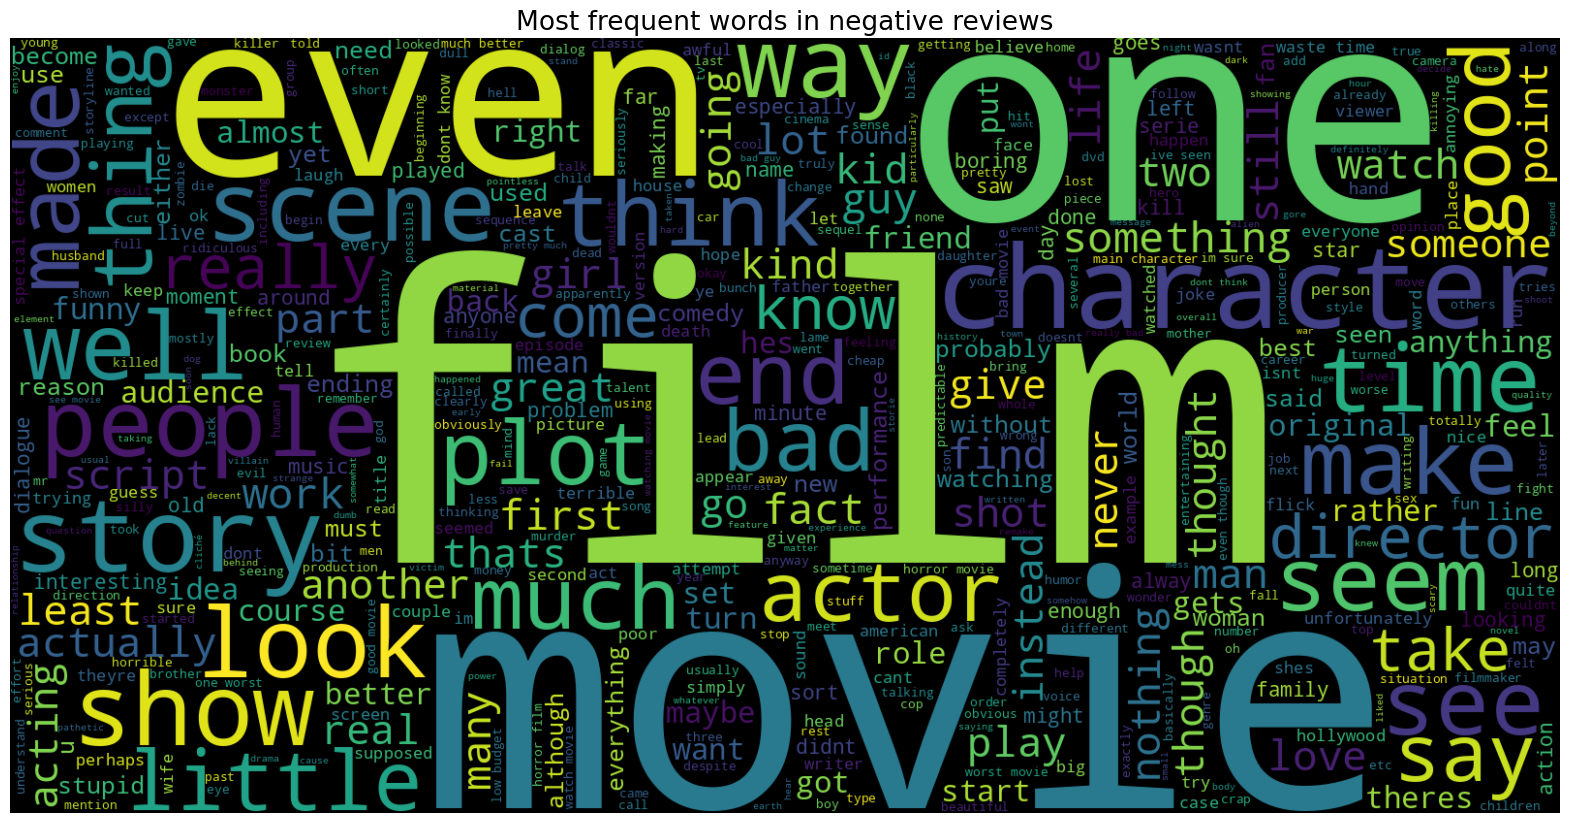

In [27]:
text = ' '.join([word for word in neg_reviews['review']])
plot.figure(figsize=(20,15) , facecolor='None')
wordcloud = WordCloud(max_words=500 , width=1600, height=800).generate(text)
plot.imshow(wordcloud, interpolation='bilinear')
plot.axis('off')
plot.title('Most frequent words in negative reviews', fontsize=19)
plot.show()

In [28]:
# This code counts the frequency of each word in negative reviews and retrieves the 15 most common words.

count = Counter()
for text in neg_reviews['review'].values:
        for word in text.split():
            count[word] += 1
count.most_common(15)

[('movie', 47001),
 ('film', 34651),
 ('one', 24361),
 ('like', 21508),
 ('even', 14759),
 ('good', 13995),
 ('bad', 13903),
 ('would', 13482),
 ('really', 12084),
 ('time', 11349),
 ('see', 10412),
 ('dont', 9912),
 ('get', 9884),
 ('much', 9758),
 ('story', 9563)]

In [29]:
neg_words = pd.DataFrame(count.most_common(15))
neg_words.columns = ['word', 'count']
neg_words.head()

,word,count
0,movie,47001
1,film,34651
2,one,24361
3,like,21508
4,even,14759


In [30]:
px.bar(neg_words , x='count' , y='word' , title='Common words in negative reviews', color='word')

In [31]:
X = df['review']
Y = df['sentiment']

# TF-IDF  [(Term Frequency-Inverse Document Frequency)].
(TfidfVectorizer)
To convert text into numeric format.

In [32]:
vect = TfidfVectorizer()
X = vect.fit_transform(df['review'])

In [33]:
x_train ,x_test, y_train , y_test = train_test_split(X,Y, test_size=0.3,random_state=42)

In [34]:
print("size of X_train: ", (x_train.shape))
print("size of y_train: ", (y_train.shape))
print("size of X_test: ", (x_test.shape))
print("size of y_test: ", (y_test.shape))

size of X_train:  (34704, 221707)
size of y_train:  (34704,)
size of X_test:  (14874, 221707)
size of y_test:  (14874,)


# Model


In [35]:
from sklearn.linear_model import LogisticRegression
from  sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report , confusion_matrix
import warnings
warnings.filterwarnings('ignore')

In [36]:
logreg = LogisticRegression() #  Logistic Regressio model
logreg.fit(x_train, y_train)
logreg_pred = logreg.predict(x_test)
logreg_acc = accuracy_score(logreg_pred, y_test)
print("Tesy accuracy:  {:.2f}%".format(logreg_acc*100))

Tesy accuracy:  89.00%


In [37]:
print(confusion_matrix(y_test , logreg_pred))
print("\n")
print(classification_report(y_test, logreg_pred))

[[6785  728]
 [ 908 6453]]


              precision    recall  f1-score   support

           1       0.88      0.90      0.89      7513
           2       0.90      0.88      0.89      7361

    accuracy                           0.89     14874
   macro avg       0.89      0.89      0.89     14874
weighted avg       0.89      0.89      0.89     14874



In [38]:
mnb = MultinomialNB()  # Naive baiyse model
mnb.fit(x_train, y_train)
mnb_pred = mnb.predict(x_test)
mnb_acc = accuracy_score(mnb_pred , y_test)
print("Tesy accuracy:  {:.2f}%".format(mnb_acc*100))

Tesy accuracy:  86.44%


In [39]:
print(confusion_matrix(y_test , mnb_pred))
print("\n")
print(classification_report(y_test, mnb_pred))

[[6439 1074]
 [ 943 6418]]


              precision    recall  f1-score   support

           1       0.87      0.86      0.86      7513
           2       0.86      0.87      0.86      7361

    accuracy                           0.86     14874
   macro avg       0.86      0.86      0.86     14874
weighted avg       0.86      0.86      0.86     14874



In [40]:
svc = LinearSVC()  # SVC model
svc.fit(x_train, y_train)
svc_pred = svc.predict(x_test)
svc_acc = accuracy_score(svc_pred , y_test)
print("Tesy accuracy:  {:.2f}%".format(svc_acc*100))

Tesy accuracy:  89.22%


In [41]:
print(confusion_matrix(y_test , svc_pred))
print("\n")
print(classification_report(y_test, svc_pred))

[[6766  747]
 [ 857 6504]]


              precision    recall  f1-score   support

           1       0.89      0.90      0.89      7513
           2       0.90      0.88      0.89      7361

    accuracy                           0.89     14874
   macro avg       0.89      0.89      0.89     14874
weighted avg       0.89      0.89      0.89     14874



Tunning of SVC